# Importing Excel Files

In [1]:
%matplotlib inline
import numpy as np              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imoprting excel files
equestions=df= pd.read_excel (r'C:\Users\Hanna\OneDrive\Documents\LRDC\Chinese_Korean_Spanish_FINAL.xlsx', sheet_name='Questions')
estrictest=df= pd.read_excel (r'C:\Users\Hanna\OneDrive\Documents\LRDC\Chinese_Korean_Spanish_FINAL.xlsx', sheet_name='Responses-Strictest')
eloose=df= pd.read_excel (r'C:\Users\Hanna\OneDrive\Documents\LRDC\Chinese_Korean_Spanish_FINAL.xlsx', sheet_name='Responses-Loose')
elimited=df= pd.read_excel (r'C:\Users\Hanna\OneDrive\Documents\LRDC\Chinese_Korean_Spanish_FINAL.xlsx', sheet_name='Responses-Limited')
einfo=df= pd.read_excel (r'C:\Users\Hanna\OneDrive\Documents\LRDC\Chinese_Korean_Spanish_FINAL.xlsx', sheet_name='Info')

In [3]:
# alternate way to read files through csv
questions=pd.read_csv('Questions.csv')
strict=pd.read_csv('Responses-Strictest.csv')
loose=pd.read_csv('Responses-Loose.csv')
limited=pd.read_csv('Responses-Limited.csv')
info=pd.read_csv('Info.csv')

# Data Analysis/Cleaning of Strictest

In [4]:
# total of each
#tfilter=strict[strict.level_id>=3]
total=strict['anon_id'].nunique()

cfilter=strict[(strict.L1=='Chinese')]
ctotal=cfilter['anon_id'].nunique()

kfilter=strict[strict.L1=='Korean']
ktotal=kfilter['anon_id'].nunique()

sfilter=strict[strict.L1=='Spanish']
stotal=sfilter['anon_id'].nunique()

print('Total Participants:   ',total,'\nChinese Participants: ',ctotal,
      '\nKorean Participants:  ',ktotal,
         '\nSpanish Pariticpants: ',stotal)

Total Participants:    212 
Chinese Participants:  76 
Korean Participants:   94 
Spanish Pariticpants:  42


Text(0.5, 1.0, 'Number of Participants of each Language')

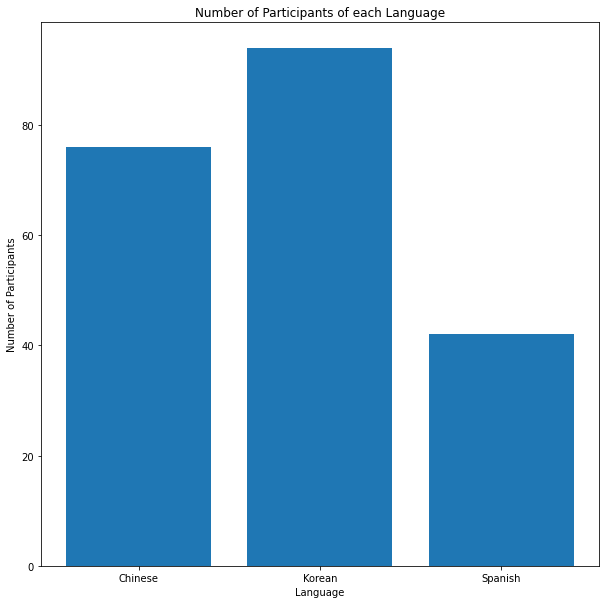

In [5]:
plt.figure(figsize=(10,10))

var= [ctotal,ktotal,stotal]
langs={'Chinese':76,'Korean':94,'Spanish':42}
keys=langs.keys()
vals=langs.values()
plt.bar(keys,vals)
plt.xlabel('Language')
plt.ylabel('Number of Participants')
plt.title('Number of Participants of each Language')

In [6]:
#Q2
totalfilter=strict[strict.level_id==3]
ltotal=totalfilter['anon_id'].nunique()

lcfilter=strict[(strict.L1=='Chinese') & (strict.level_id==3)]
lctotal=lcfilter['anon_id'].nunique()

lkfilter=strict[(strict.L1=='Korean') & (strict.level_id==3)]
lktotal=lkfilter['anon_id'].nunique()

lsfilter=strict[(strict.L1=='Spanish') & (strict.level_id==3)]
lstotal=lsfilter['anon_id'].nunique()

print('Participants in Level 3 -\n'
      'Total Participants:   ',ltotal,'\nChinese Participants: ',lctotal,
      '\nKorean Participants:  ',lktotal,
         '\nSpanish Pariticpants: ',lstotal)

Participants in Level 3 -
Total Participants:    39 
Chinese Participants:  10 
Korean Participants:   20 
Spanish Pariticpants:  9


In [7]:
ltotalfilter=strict[strict.level_id==4]
lltotal=ltotalfilter['anon_id'].nunique()

llcfilter=strict[(strict.L1=='Chinese') & (strict.level_id==4)]
llctotal=llcfilter['anon_id'].nunique()

llkfilter=strict[(strict.L1=='Korean') & (strict.level_id==4)]
llktotal=llkfilter['anon_id'].nunique()

llsfilter=strict[(strict.L1=='Spanish') & (strict.level_id==4)]
llstotal=llsfilter['anon_id'].nunique()

print('Participants in Level 4 -\n'
      'Total Participants:   ',lltotal,'\nChinese Participants: ',llctotal,
      '\nKorean Participants:  ',llktotal,
         '\nSpanish Pariticpants: ',llstotal)

Participants in Level 4 -
Total Participants:    128 
Chinese Participants:  49 
Korean Participants:   54 
Spanish Pariticpants:  25


In [8]:
lltotalfilter=strict[strict.level_id==5]
llltotal=lltotalfilter['anon_id'].nunique()

lllcfilter=strict[(strict.L1=='Chinese') & (strict.level_id==5)]
lllctotal=lllcfilter['anon_id'].nunique()

lllkfilter=strict[(strict.L1=='Korean') & (strict.level_id==5)]
lllktotal=lllkfilter['anon_id'].nunique()

lllsfilter=strict[(strict.L1=='Spanish') & (strict.level_id==5)]
lllstotal=lllsfilter['anon_id'].nunique()

print('Participants in Level 4 -\n'
      'Total Participants:   ',llltotal,'\nChinese Participants: ',lllctotal,
      '\nKorean Participants:  ',lllktotal,
         '\nSpanish Pariticpants: ',lllstotal)

Participants in Level 4 -
Total Participants:    96 
Chinese Participants:  37 
Korean Participants:   43 
Spanish Pariticpants:  16


In [9]:
ids_lvl=strict.drop(columns=['3Langs','Item','answer_id','gender','course_id','class_id','question_id','version','text1_len','text2_len',
                   'text3_len', 'text1','text2 (line breaks/extra spaces removed, spaces added to reach 60)',
                   'text3 (edits made to fix word counts)','Judgement','Notes'])
ids_lvl

,anon_id,L1,level_id
0,az8,Chinese,5
1,az2,Korean,5
2,ea7,Spanish,5
3,cd6,Chinese,4
4,eu6,Korean,4
...,...,...,...
618,ec1,Korean,4
619,cq1,Spanish,4
620,bv8,Chinese,4
621,dr8,Korean,4


# Get the anon_ids into an array so they can be used in binarySearchArr()

In [116]:
anon_ids=[]
index=0
for i in ids_lvl.anon_id:
    anon_ids.append(ids_lvl.at[index, 'anon_id'])
    index+=1


In [11]:
user_id_multilevel_group_by = ids_lvl.groupby(['anon_id','level_id']).size()
print(user_id_multilevel_group_by)

anon_id  level_id
aa0      5           4
aa8      4           2
         5           2
aa9      3           1
         4           3
                    ..
gz5      4           1
gz7      4           2
ha0      5           2
ha2      4           2
         5           7
Length: 263, dtype: int64


In [12]:
def get_uniques(x):
    return list(x.unique())

clean_ids_lvl=ids_lvl.groupby('anon_id').agg(
    n_anon_ids=('level_id', 'nunique'),
    lvl_nums=('level_id', get_uniques)
)

In [13]:
clean_ids_lvl

,n_anon_ids,lvl_nums
anon_id,,
aa0,1,[5]
aa8,2,"[4, 5]"
aa9,2,"[3, 4]"
ac3,1,[4]
ac5,2,"[4, 5]"
...,...,...
gz0,1,[3]
gz5,1,[4]
gz7,1,[4]


In [14]:
ind=[]
lim=212
val=0
while val<lim:
    ind.append(val)
    val=val+1


In [15]:
print(ind[211])

211


In [16]:
with_ind= clean_ids_lvl.reset_index()
with_ind

,anon_id,n_anon_ids,lvl_nums
0,aa0,1,[5]
1,aa8,2,"[4, 5]"
2,aa9,2,"[3, 4]"
3,ac3,1,[4]
4,ac5,2,"[4, 5]"
...,...,...,...
207,gz0,1,[3]
208,gz5,1,[4]
209,gz7,1,[4]
210,ha0,1,[5]


# Finds how many participants are in all three

In [17]:

ind=0
all_three=[]
append=''
for i in with_ind.anon_id:
    if with_ind.iat[ind, 1]==3:
        append=with_ind.at[ind,'anon_id']
        all_three.append(append)
    ind=ind+1

len(all_three)


4

In [18]:
ind=0
in_two=[]
append=''
for i in with_ind.anon_id:
    if with_ind.iat[ind, 1]==2:
        if (3 in with_ind.iat[ind,2] and 4 in with_ind.iat[ind,2]):
            append=with_ind.at[ind,'anon_id']
            in_two.append(append)
    elif with_ind.iat[ind,1]==3:
        append=with_ind.at[ind,'anon_id']
        in_two.append(append)
    ind=ind+1
len(in_two)

11

In [19]:
print(all_three)

['an5', 'ar8', 'bv9', 'bz2']


In [20]:
print(in_two)

['aa9', 'an5', 'ar8', 'bv9', 'bz2', 'cf6', 'ch0', 'cw6', 'fn8', 'fv7', 'gv1']


In [21]:
ind=0
in_45=[]
append=''
for i in with_ind.anon_id:
    if with_ind.iat[ind, 1]==2:
        if (4 in with_ind.iat[ind,2] and 5 in with_ind.iat[ind,2]):
            append=with_ind.at[ind,'anon_id']
            in_45.append(append)
    elif with_ind.iat[ind,1]==3:
        append=with_ind.at[ind,'anon_id']
        in_45.append(append)
    ind=ind+1


In [152]:
test2=ids_lvl.groupby('anon_id')['level_id'].count()
counts=test2.reset_index()
counts

anon_id
aa0     4
aa8     4
aa9     4
ac3     4
ac5    10
       ..
gz0     1
gz5     1
gz7     2
ha0     2
ha2     9
Name: level_id, Length: 212, dtype: int64


,anon_id,level_id
0,aa0,4
1,aa8,4
2,aa9,4
3,ac3,4
4,ac5,10
...,...,...
207,gz0,1
208,gz5,1
209,gz7,2
210,ha0,2


In [23]:

for part in in_45:
    for i in counts.anon_id:
        if in_45[part]=counts.at[i, 'anon_id']:
             

SyntaxError: invalid syntax (<ipython-input-23-fee5ec28cd4e>, line 3)

# Binary Search

In [24]:
ids_lang=ids_lvl.drop(columns='level_id')

In [25]:
ids_lang

,anon_id,L1
0,az8,Chinese
1,az2,Korean
2,ea7,Spanish
3,cd6,Chinese
4,eu6,Korean
...,...,...
618,ec1,Korean
619,cq1,Spanish
620,bv8,Chinese
621,dr8,Korean


In [137]:
#bin search for arrays
def binarySearchArr(arr, x):
    l = 0
    r = len(arr)
    while (l <= r):
        m = l + ((r - l) // 2)
 
        res = (x == arr[m])
        # Check if x is present at mid
        if (res == True):
            return m
 
        # If x greater, ignore left half
    #problem is here
        elif (res == False):
            if (x>arr[m]):
                l = m+1
            elif (x<arr[m]):
                r=m-1
        # If x is smaller, ignore right half
    return -1
 

In [138]:
anon_ids.sort()
val=binarySearchArr(anon_ids, 'aa8')
print(val)
print(anon_ids[val])

5
aa8


In [61]:
index=binarySearch(in_45, 'bz2')
print(in_45[index])

dc6


In [28]:
key="one"

if key in mydict.keys():
    print("Key exists")

NameError: name 'mydict' is not defined

In [ ]:
df.sort_values(by=['col1'])

In [153]:
sorted_df=ids_lvl.sort_values(by=['anon_id']).reset_index(drop=True)
#sorted_df.reindex(drop=True)
sorted_df

,anon_id,L1,level_id
0,aa0,Spanish,5
1,aa0,Spanish,5
2,aa0,Spanish,5
3,aa0,Spanish,5
4,aa8,Korean,4
...,...,...,...
618,ha2,Korean,5
619,ha2,Korean,5
620,ha2,Korean,5
621,ha2,Korean,5


In [156]:
index=0
lang_dict={}
for i in in_45:
    df_index=binarySearchArr(anon_ids,i)
    key=sorted_df.at[df_index,'anon_id']
    val=sorted_df.at[df_index,'L1']
    if key not in lang_dict.keys():
        lang_dict.update({key: val})
print(lang_dict)

{'aa8': 'Korean', 'ac5': 'Korean', 'an5': 'Korean', 'aq1': 'Chinese', 'ar8': 'Chinese', 'ar9': 'Chinese', 'au5': 'Korean', 'au6': 'Korean', 'az8': 'Chinese', 'bi4': 'Spanish', 'bl7': 'Chinese', 'bu4': 'Korean', 'bv9': 'Korean', 'bz2': 'Chinese', 'cb3': 'Chinese', 'cc4': 'Korean', 'ce3': 'Korean', 'cv7': 'Spanish', 'cz4': 'Chinese', 'dc0': 'Chinese', 'dc6': 'Spanish', 'dd9': 'Korean', 'df4': 'Spanish', 'dm8': 'Chinese', 'dq9': 'Chinese', 'dy7': 'Korean', 'ei8': 'Chinese', 'ev6': 'Chinese', 'ev9': 'Chinese', 'fa2': 'Spanish', 'ff1': 'Korean', 'ff2': 'Chinese', 'fk8': 'Chinese', 'fu6': 'Korean', 'fx4': 'Korean', 'fx7': 'Spanish', 'gm1': 'Chinese', 'ha2': 'Korean'}


In [157]:
len(lang_dict)

38

In [142]:
len(in_45)

38

In [143]:
print(all_three)
print(in_45)

['an5', 'ar8', 'bv9', 'bz2']
['aa8', 'ac5', 'an5', 'aq1', 'ar8', 'ar9', 'au5', 'au6', 'az8', 'bi4', 'bl7', 'bu4', 'bv9', 'bz2', 'cb3', 'cc4', 'ce3', 'cv7', 'cz4', 'dc0', 'dc6', 'dd9', 'df4', 'dm8', 'dq9', 'dy7', 'ei8', 'ev6', 'ev9', 'fa2', 'ff1', 'ff2', 'fk8', 'fu6', 'fx4', 'fx7', 'gm1', 'ha2']


In [23]:
>>> # Get all rows with an ID that appears multiple times
df=ids_lvl
is_duplicate = df.anon_id.isin(df.anon_id.value_counts()[df.anon_id.value_counts() > 1].keys())

 # Get all rows if the ID has at least one score = 1
score_equal_to_1 = df.anon_id.isin(df[df.level_id == 3].anon_id.values)

# Apply both constraints to the dataframe
gf=df[is_duplicate & score_equal_to_1]
gf.head()

,anon_id,L1,level_id
30,aa9,Korean,3
34,fv7,Korean,3
37,gv1,Korean,3
49,fv7,Korean,4
51,gv1,Korean,4


In [61]:
#Getting anon_id of everyone that was lvl 3
lvl3=[]
entry=''
e=0
for i in ids_lvl.anon_id:
    if ids_lvl.iat[e, 2]==3:
        entry=ids_lvl.iat[e, 0]
        lvl3.append(entry)
    e=e+1
len(lvl3)
ids_lvl

#this makes sure we have each unique id 
ulvl3=[]
for i in lvl3:
    if i not in ulvl3:
        ulvl3.append(i)


In [65]:
#Getting anon_id of everyone that was lvl 4
lvl4=[]
entry=''
e=0
for i in ids_lvl.anon_id:
    if ids_lvl.iat[e, 2]==4:
        entry=ids_lvl.iat[e, 0]
        lvl4.append(entry)
    e=e+1
len(lvl4)
ids_lvl

#this makes sure we have each unique id 
ulvl4=[]
for i in lvl4:
    if i not in ulvl4:
        ulvl4.append(i)


In [89]:
#Getting anon_id of everyone that was lvl 5
lvl5=[]
entry=''
e=0
for i in ids_lvl.anon_id:
    if ids_lvl.iat[e, 2]==5:
        entry=ids_lvl.iat[e, 0]
        lvl5.append(entry)
    e=e+1

#this makes sure we have each unique id 
ulvl5=[]
for i in lvl5:
    if i not in ulvl5:
        ulvl5.append(i)


In [82]:
#BINARY SEARCH FUNCTION

# Returns index of x in arr if present, else -1
def binary_search(arr, low, high, x):
 
    # Check base case
    if high >= low:
 
        mid = (high + low) // 2
        #print(mid)
 
        # If element is present at the middle itself
        if arr[mid] == x:
            return mid
 
        # If element is smaller than mid, then it can only
        # be present in left subarray
        elif arr[mid] > x:
            return binary_search(arr, low, mid - 1, x)
 
        # Else the element can only be present in right subarray
        else:
            return binary_search(arr, mid + 1, high, x)
 
    else:
        # Element is not present in the array
        return -1

In [87]:
##BINARY FOR STRING IS DIFFERENT must use sorted list
lst3=ulvl3.sort()
print(lst3)

None


# References
https://emark.colop.com/faq/index.php?action=artikel&cat=3&id=135&artlang=en#:~:text=Go%20to%20File%20and%20then%20Save%20as.,the%20name%20of%20the%20file.
https://www.geeksforgeeks.org/python-program-for-binary-search/
